# Machine Predictive Maintenance Classification


## Overview
This project focuses on predictive maintenance, utilizing a synthetic dataset that mirrors real-world scenarios in the industry. The dataset comprises 10,000 data points with 14 features, including information about air temperature, process temperature, rotational speed, torque, tool wear, and machine failure indicators.


## Dataset Details
- Unique Identifier (UID): Ranges from 1 to 10,000.
- Product ID: Variants L (50%), M (30%), and H (20%) with specific serial numbers.
- Air Temperature [K]: Generated with a random walk process, normalized around 300 K.
- Process Temperature [K]: Random walk process, normalized to a standard deviation of 1 K, added to air temperature plus 10 K.
- Rotational Speed [rpm]: Calculated from power of 2860 W, overlaid with normally distributed noise.
- Torque [Nm]: Normally distributed around 40 Nm with σ = 10 Nm, no negative values.
- Tool Wear [min]: Quality variants H/M/L add 5/3/2 minutes of tool wear.
- Targets:
   - Failure or Not
   - Failure Type: Tool wear failure, heat dissipation failure, power failure, overstrain failure, random failures.

## Acknowledgements
The dataset is sourced from the UCI Predictive Maintenance Dataset.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf


## Load the Dataset

In [2]:
url = "https://raw.githubusercontent.com/alishaminj12/Predictive-Maintenance-Classification-A-Machine-Learning-Approach/main/ai4i2020.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## Data Exploration

- ### Dataset Shape and Columns

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

- ### Dataset Characteristics

In [6]:
# Explore dataset characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

- ### Statistical Summary of the Dataset

In [7]:
# Display statistical summary of the dataset
df.describe()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


- ### Data Types and Null Values

In [8]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [9]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## Data Visualization

- ### Distribution of Numerical Features
Histograms of numerical features to understand their distributions.

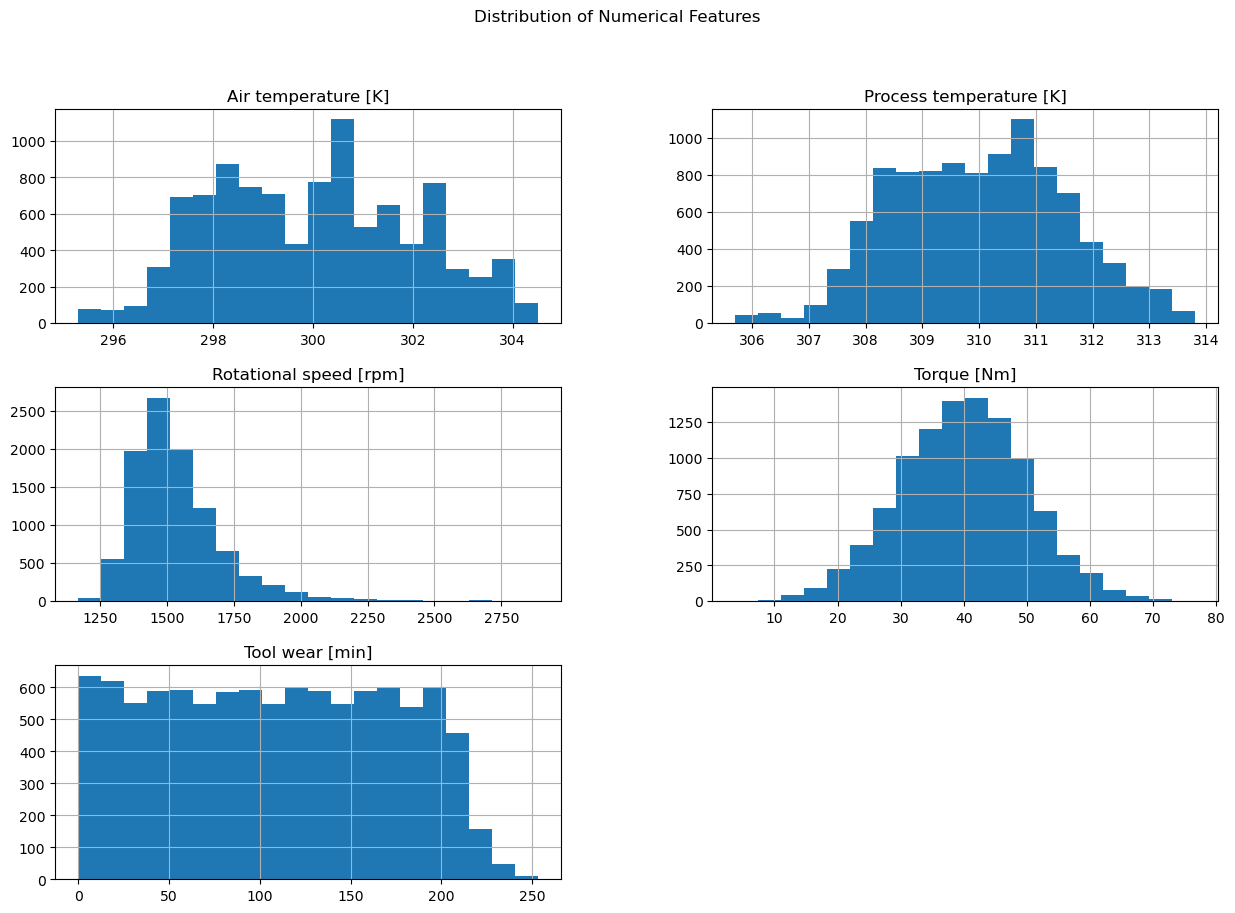

In [10]:
# Visualize the distribution of numerical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

- ### Count of Failure Types
Bar chart showing the count of each failure type.

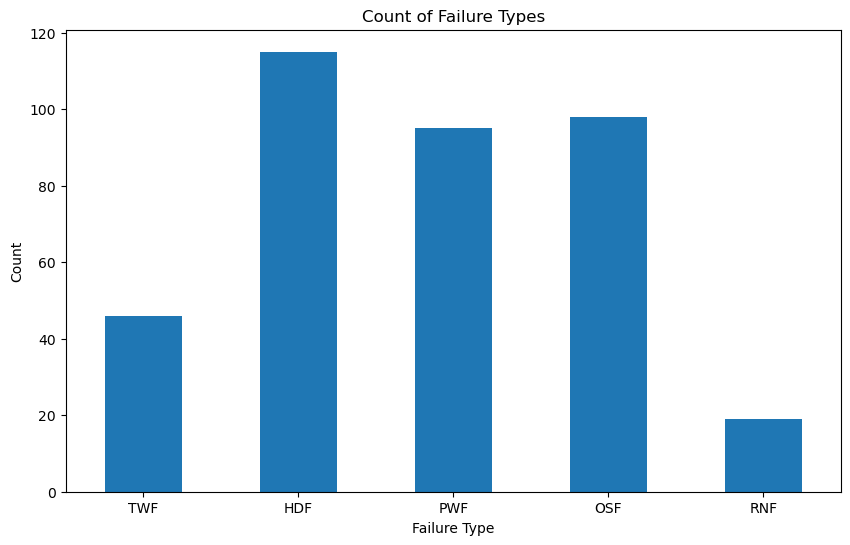

In [11]:
# Visualize the count of failure types
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
df[failure_types].sum().plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Count of Failure Types')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

- ### Correlation Matrix
Heatmap of the correlation matrix to identify relationships between features.

C:\Users\alish\AppData\Local\Temp\ipykernel_24756\930128953.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


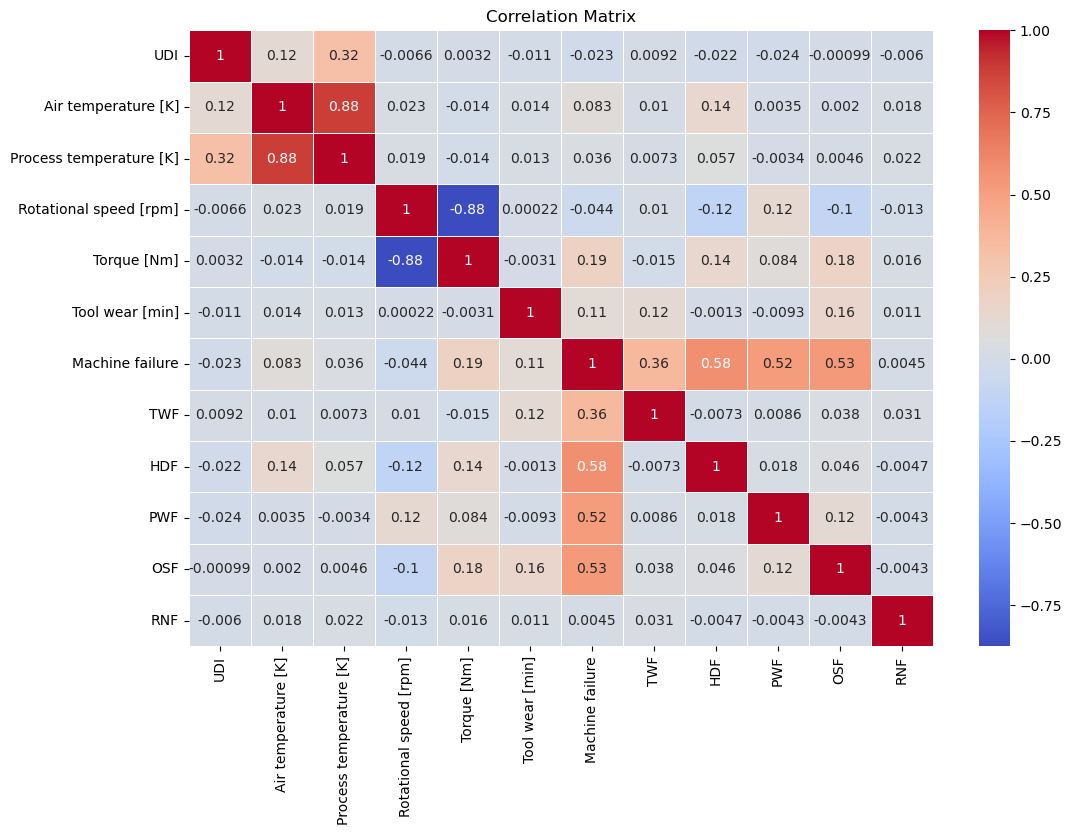

In [12]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

- ### Handling Categorical Features

In [13]:
# Convert categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Product ID', 'Type'], drop_first=True)


- ### Train-Test Split

In [14]:
# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y_failure = df_encoded['Machine failure']
y_failure_type = df_encoded[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Split the dataset into training and testing sets
X_train, X_test, y_train_failure, y_test_failure, y_train_failure_type, y_test_failure_type = train_test_split(
    X, y_failure, y_failure_type, test_size=0.2, random_state=42
)


## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the parameters from the training set
X_test_scaled = scaler.transform(X_test)


##  Machine Learning Models

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train_failure)

# Predictions
y_pred_logistic = logistic_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Results:")
print(confusion_matrix(y_test_failure, y_pred_logistic))
print(classification_report(y_test_failure, y_pred_logistic))


C:\Users\alish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
[[1929   10]
 [  44   17]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.63      0.28      0.39        61

    accuracy                           0.97      2000
   macro avg       0.80      0.64      0.69      2000
weighted avg       0.97      0.97      0.97      2000



Logistic Regression achieved an accuracy of approximately 97%. The precision for class 1 (Machine Failure) is 0.63, indicating that the model correctly predicted failures but with some false positives.

### Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train_failure)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate Decision Tree Classifier
print("Decision Tree Classifier Results:")
print(confusion_matrix(y_test_failure, y_pred_dt))
print(classification_report(y_test_failure, y_pred_dt))


Decision Tree Classifier Results:
[[1921   18]
 [  20   41]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.69      0.67      0.68        61

    accuracy                           0.98      2000
   macro avg       0.84      0.83      0.84      2000
weighted avg       0.98      0.98      0.98      2000



The Decision Tree Classifier performed well with an accuracy of around 98%. It showed a better balance between precision and recall for both classes compared to Logistic Regression.

### Random Forest Classifier

In [18]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_failure)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
print("Random Forest Classifier Results:")
print(confusion_matrix(y_test_failure, y_pred_rf))
print(classification_report(y_test_failure, y_pred_rf))


Random Forest Classifier Results:
[[1936    3]
 [  50   11]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1939
           1       0.79      0.18      0.29        61

    accuracy                           0.97      2000
   macro avg       0.88      0.59      0.64      2000
weighted avg       0.97      0.97      0.97      2000



The Random Forest Classifier demonstrated an accuracy of 97%, similar to Logistic Regression. However, it showed a better recall for class 1, indicating a reduced number of false negatives compared to Logistic Regression.

### TensorFlow Model

In [19]:
# TensorFlow Model
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the TensorFlow model
tf_model.fit(X_train, y_train_failure, epochs=10, batch_size=32, validation_data=(X_test, y_test_failure))

# Evaluate TensorFlow Model
tf_pred = tf_model.predict(X_test)
tf_pred_classes = (tf_pred > 0.5).astype(int)

print("TensorFlow Model Results:")
print(confusion_matrix(y_test_failure, tf_pred_classes))
print(classification_report(y_test_failure, tf_pred_classes))


Epoch 1/10
250/250 [==============================] - 4s 12ms/step - loss: 0.9826 - accuracy: 0.9452 - val_loss: 0.1862 - val_accuracy: 0.9700
Epoch 2/10
250/250 [==============================] - 2s 10ms/step - loss: 0.4737 - accuracy: 0.9430 - val_loss: 0.3476 - val_accuracy: 0.8750
Epoch 3/10
250/250 [==============================] - 2s 10ms/step - loss: 0.5287 - accuracy: 0.9499 - val_loss: 0.1689 - val_accuracy: 0.9695
Epoch 4/10
250/250 [==============================] - 3s 11ms/step - loss: 0.5682 - accuracy: 0.9449 - val_loss: 0.4061 - val_accuracy: 0.9695
Epoch 5/10
250/250 [==============================] - 3s 11ms/step - loss: 0.3162 - accuracy: 0.9526 - val_loss: 0.6044 - val_accuracy: 0.9695
Epoch 6/10
250/250 [==============================] - 3s 11ms/step - loss: 0.2764 - accuracy: 0.9538 - val_loss: 0.1519 - val_accuracy: 0.9460
Epoch 7/10
250/250 [==============================] - 4s 17ms/step - loss: 0.3381 - accuracy: 0.9539 - val_loss: 0.1080 - val_accuracy: 0.9685

The TensorFlow Model had an accuracy of 97%, similar to the other models. However, it struggled with class 1, as reflected in the precision and recall values. The model might need further tuning or a more complex architecture for better performance.

## Support Vector Machine (SVM) Classifier

The Support Vector Machine (SVM) classifier was trained using a linear kernel with a random state set to 42.

In [20]:
from sklearn.svm import SVC 

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train_failure)

# Predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM Classifier
print("Support Vector Machine Classifier Results:")
print(confusion_matrix(y_test_failure, y_pred_svm))
print(classification_report(y_test_failure, y_pred_svm))


Support Vector Machine Classifier Results:
[[1930    9]
 [  45   16]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.64      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



The SVM classifier achieved an accuracy of 97% on the test set, with a precision of 64%, recall of 26%, and an F1-score of 37% for the minority class (failure).


## Gradient Boosting Classifier

The Gradient Boosting Classifier was trained with 100 estimators and a random state of 42. Here are the results:


In [22]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train_failure)

# Predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate Gradient Boosting Classifier
print("Gradient Boosting Classifier Results:")
print(confusion_matrix(y_test_failure, y_pred_gb))
print(classification_report(y_test_failure, y_pred_gb))


Gradient Boosting Classifier Results:
[[1933    6]
 [  31   30]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.83      0.49      0.62        61

    accuracy                           0.98      2000
   macro avg       0.91      0.74      0.80      2000
weighted avg       0.98      0.98      0.98      2000



The Gradient Boosting Classifier outperformed the SVM, achieving an accuracy of 98% on the test set, with a precision of 83%, recall of 49%, and an F1-score of 62% for the minority class (failure).


## Conclusion
In this predictive maintenance classification project, various machine learning models were trained and evaluated on a synthetic dataset. The Gradient Boosting Classifier emerged as the top-performing model,